In [2]:
import json
import pandas as pd
from typing import Dict, Tuple, List
import os, sys
from model.indexer import Indexer
from model.indexer import load_amr_config

amr, slot, task, precedence = load_amr_config("data/amr3_slots3_task3.json")
print(amr)
print(slot)
print(task)
print(precedence)

['R1', 'R2', 'R3']
[0, 1, 2]
[{'name': 'T1', 'p': 1}, {'name': 'T2', 'p': 2}, {'name': 'T3', 'p': 3}]
[['T1', 'T3'], ['T2', 'T3']]


In [3]:
from model.indexer import assign_ent_to_indexer
indexer = Indexer()
indexer_, x, y, w = assign_ent_to_indexer(indexer, amr, slot, task)
def indexer_to_dataframe(indexer):
    data = []
    for idx, key in enumerate(indexer._from_idx):
        data.append({"index": idx, "variable": key})
    df = pd.DataFrame(data)
    return df
df = indexer_to_dataframe(indexer)
print(df)

    index        variable
0       0     (x, T1, R1)
1       1     (x, T1, R2)
2       2     (x, T1, R3)
3       3      (y, T1, 0)
4       4      (y, T1, 1)
5       5      (y, T1, 2)
6       6  (w, T1, R1, 0)
7       7  (w, T1, R1, 1)
8       8  (w, T1, R1, 2)
9       9  (w, T1, R2, 0)
10     10  (w, T1, R2, 1)
11     11  (w, T1, R2, 2)
12     12  (w, T1, R3, 0)
13     13  (w, T1, R3, 1)
14     14  (w, T1, R3, 2)
15     15     (x, T2, R1)
16     16     (x, T2, R2)
17     17     (x, T2, R3)
18     18      (y, T2, 0)
19     19      (y, T2, 1)
20     20      (y, T2, 2)
21     21  (w, T2, R1, 0)
22     22  (w, T2, R1, 1)
23     23  (w, T2, R1, 2)
24     24  (w, T2, R2, 0)
25     25  (w, T2, R2, 1)
26     26  (w, T2, R2, 2)
27     27  (w, T2, R3, 0)
28     28  (w, T2, R3, 1)
29     29  (w, T2, R3, 2)
30     30     (x, T3, R1)
31     31     (x, T3, R2)
32     32     (x, T3, R3)
33     33      (y, T3, 0)
34     34      (y, T3, 1)
35     35      (y, T3, 2)
36     36  (w, T3, R1, 0)
37     37  (

In [4]:
from model.qubo_builder import QuboBuilder
qb = QuboBuilder(indexer)

In [5]:
from model.objectives.makespan import add_makespan_objective
from model.objectives.balance import add_workload_balance_objective
w_makespan = 1.0
w_balance = 0.5
add_makespan_objective(qb, task, slot, y, w_makespan)
#add_workload_balance_objective(qb, task, amr, x, w_balance)
df = qb.to_dataframe(use_labels=True)
#print(df)

In [6]:
from model.constraints import c1
c1.add_startslot_exactly_one_constraints(qb, task, slot, y, lam_c1=10.0) 

In [7]:
from model.constraints import c3_
c3_.add_c3_capacity_no_overlap(qb, task, amr, slot, x, y, w, lam_c3_and=10, lam_c3_cap=10)

In [8]:
from model.constraints import c4
c4.add_c4_consistency_inline(qb, task, amr, slot, x, y, lam_c4=0)

In [9]:
from model.constraints import c2
c2.add_assignment_exactly_one_constraints(qb, task, amr, x, lam_c2=10)

In [10]:
print(qb.Q)

defaultdict(<class 'float'>, {(3, 3): -9.0, (4, 4): -6.0, (5, 5): -1.0, (18, 18): -6.0, (19, 19): -1.0, (20, 20): 6.0, (33, 33): -1.0, (34, 34): 6.0, (35, 35): 15.0, (3, 4): 20.0, (3, 5): 20.0, (4, 5): 20.0, (18, 19): 20.0, (18, 20): 20.0, (19, 20): 20.0, (33, 34): 20.0, (33, 35): 20.0, (34, 35): 20.0, (6, 6): 30.0, (0, 6): -30.0, (3, 6): -10.0, (7, 7): 30.0, (0, 7): -30.0, (4, 7): -10.0, (8, 8): 30.0, (0, 8): -30.0, (5, 8): -10.0, (6, 7): 20.0, (6, 8): 20.0, (7, 8): 20.0, (0, 0): 0.0, (9, 9): 30.0, (1, 9): -30.0, (3, 9): -10.0, (10, 10): 30.0, (1, 10): -30.0, (4, 10): -10.0, (11, 11): 30.0, (1, 11): -30.0, (5, 11): -10.0, (9, 10): 20.0, (9, 11): 20.0, (10, 11): 20.0, (1, 1): 0.0, (12, 12): 30.0, (2, 12): -30.0, (3, 12): -10.0, (13, 13): 30.0, (2, 13): -30.0, (4, 13): -10.0, (14, 14): 30.0, (2, 14): -30.0, (5, 14): -10.0, (12, 13): 20.0, (12, 14): 20.0, (13, 14): 20.0, (2, 2): 0.0, (21, 21): 30.0, (15, 21): -50.0, (18, 21): -10.0, (22, 22): 30.0, (15, 22): -50.0, (18, 22): -10.0, (19, 

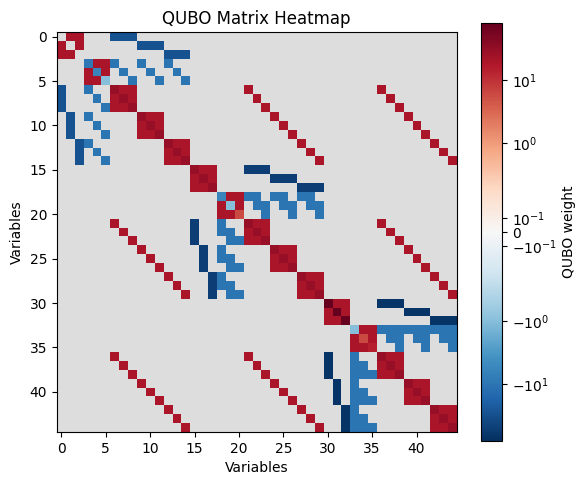

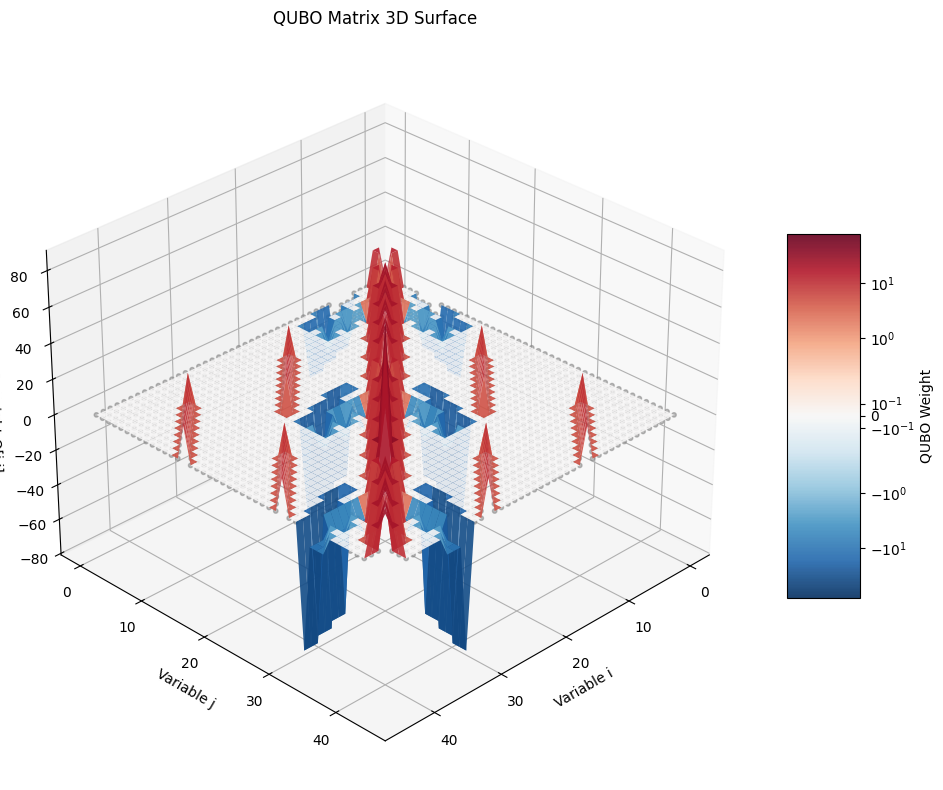

(<Figure size 1000x800 with 2 Axes>,
 <Axes3D: title={'center': 'QUBO Matrix 3D Surface'}, xlabel='Variable i', ylabel='Variable j', zlabel='QUBO Weight Q[i,j]'>)

In [11]:
import old.plot_qb_heatmap as plot_qb_heatmap
import importlib
importlib.reload(plot_qb_heatmap)
df = qb.to_dataframe(use_labels=True)
plot_qb_heatmap.plot_qubo_heatmap(df, labels=df.columns.tolist(),linthresh=0.5, tiny_mark=0.1, vmax_pct=99.5)
plot_qb_heatmap.plot_qubo_3d_surface(df)

In [ ]:
import importlib
from model.constraints import c1, c2, c3_, c4, c5
#importlib.reload(c3)
lam_c1 = 50
lam_c2 = 50
lam3_and = 15
lam3_cap = 15
lam_c4 = 1
lam_c5 = 4

c1.add_startslot_exactly_one_constraints(qb, task, slot, y, lam_c1) 
c2.add_assignment_exactly_one_constraints(qb, task, amr, x, lam_c2) 
c3_.add_c3_capacity_no_overlap_inline(qb, task, amr, slot, x, y, w, lam3_and, lam3_cap)
c4.add_c4_consistency_inline(qb, task, amr, slot, x, y, lam_c4)
c5.add_c5_precedence_inline(qb, task, slot, y, precedence, lam_c5)

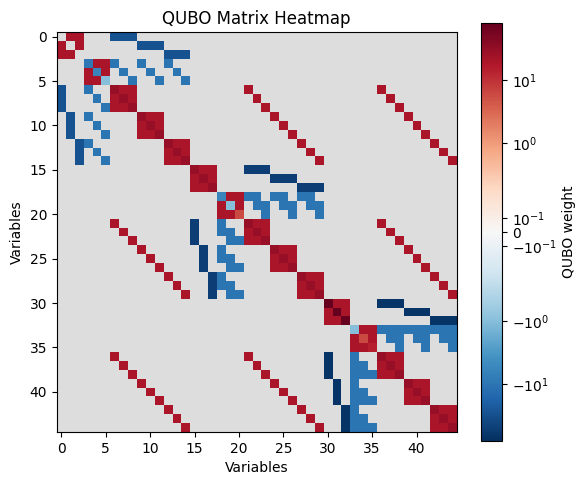

In [12]:
importlib.reload(plot_qb_heatmap)
df = qb.to_dataframe(use_labels=True)
plot_qb_heatmap.plot_qubo_heatmap(df, labels=df.columns.tolist(),linthresh=0.5, tiny_mark=0.1, vmax_pct=99.5)

In [13]:

import numpy as np
df = qb.to_dataframe()
H_obj = df.filter(like='objective')  # falls du sie getaggt hast
print("QUBO absolute values:", np.percentile(np.abs(df.values), [5,50,95]))

QUBO absolute values: [ 0.  0. 20.]


In [14]:
import dimod, neal
Q = dict(qb.Q) 
Q_upper = {(i, j): w for (i, j), w in Q.items() if i <= j}
bqm = dimod.BinaryQuadraticModel.from_qubo(Q_upper)
sampler = neal.SimulatedAnnealingSampler()
sampleset = sampler.sample(bqm, num_reads=5000, sweeps=20000, beta_range=(0.1, 10.0), seed=123)
print(sampleset)
asym = [((i,j), w - Q.get((j,i),0.0)) for (i,j), w in Q.items() if i>j and abs(w - Q.get((j,i),0.0))>1e-9]
print("Asymmetrien:", len(asym))
E_neal = sampleset.lowest().first.energy
print(E_neal)

      0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 ... 44 energy num_oc.
0     0  0  1  1  0  0  0  0  0  0  0  0  1  0  0  0  1 ...  0  -46.0       1
1     0  1  0  1  0  0  0  0  0  1  0  0  0  0  0  1  0 ...  1  -46.0       1
2     0  0  1  1  0  0  0  0  0  0  0  0  1  0  0  1  0 ...  0  -46.0       1
4     0  0  1  1  0  0  0  0  0  0  0  0  1  0  0  1  0 ...  0  -46.0       1
6     0  1  0  1  0  0  0  0  0  1  0  0  0  0  0  1  0 ...  1  -46.0       1
8     0  1  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0 ...  0  -46.0       1
10    0  0  1  1  0  0  0  0  0  0  0  0  1  0  0  1  0 ...  0  -46.0       1
11    1  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0 ...  0  -46.0       1
12    0  0  1  1  0  0  0  0  0  0  0  0  1  0  0  0  1 ...  0  -46.0       1
13    0  0  1  1  0  0  0  0  0  0  0  0  1  0  0  1  0 ...  0  -46.0       1
14    1  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0 ...  0  -46.0       1
15    0  0  1  1  0  0  0  0  0  0  0  0  1  0  0  0  1 ...  0  

In [ ]:
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.algorithms import CplexOptimizer
Q = dict(qb.Q)
Q_upper = {(i, j): w for (i, j), w in Q.items() if i <= j}
n = max(max(i, j) for (i, j) in Q.keys()) + 1
qp = QuadraticProgram()
qp.binary_var_list(n)
linear = {}
quadratic = {}
for (i, j), weight in Q.items():
    if i == j:
        linear[i] = linear.get(i, 0.0) + weight
    else:
        a, b = (i, j) if i < j else (j, i)
        quadratic[(a, b)] = quadratic.get((a, b), 0.0) + weight
qp.minimize(linear=linear, quadratic=quadratic)
optimizer = CplexOptimizer()
result = optimizer.solve(qp)
print(result)            
print("Objektwert:", result.fval)
print("Lösung x:", result.x)

# Wenn du die Lösung als Dict möchtest (Index -> 0/1):
solution = {i: int(round(v)) for i, v in enumerate(result.x)}
print("Lösung (Dict):", solution)


In [ ]:
from qiskit_optimization import QuadraticProgram
from qiskit.quantum_info import SparsePauliOp

Q = dict(qb.Q)
n = max(max(i, j) for (i, j) in Q.keys()) + 1
qp = QuadraticProgram()
qp.binary_var_list(n)
linear = {}
quadratic = {}
for (i, j), weight in Q.items():
    if i == j:
        linear[i] = linear.get(i, 0.0) + weight
    else:
        a, b = (i, j) if i < j else (j, i)
        quadratic[(a, b)] = quadratic.get((a, b), 0.0) + weight


def dict_to_qubo_matrix(linear_terms: dict, quadratic_terms: dict, n_vars: int = 56) -> np.ndarray:
    """
    Konvertiert linear und quadratische Terme in eine vollständige QUBO-Matrix
    
    QUBO-Format: x^T Q x, wobei Q eine obere Dreiecksmatrix ist
    - Diagonale: lineare Terme
    - Off-Diagonale (i,j mit i<j): quadratische Terme (bereits mit Faktor 1, nicht 1/2!)
    
    Args:
        linear_terms: Dictionary mit {index: coefficient}
        quadratic_terms: Dictionary mit {(i,j): coefficient}
        n_vars: Anzahl der Variablen
    
    Returns:
        Q: QUBO-Matrix als NumPy Array (n_vars x n_vars)
    """
    Q = np.zeros((n_vars, n_vars))
    
    for i, coeff in linear_terms.items():
        Q[i, i] = coeff
    for (i, j), coeff in quadratic_terms.items():
        if i < j:
            Q[i, j] = coeff
        elif i > j:
            Q[j, i] = coeff
    
    return Q
Q = dict_to_qubo_matrix(linear, quadratic, n)
np.set_printoptions(threshold=np.inf,linewidth=200,precision=1, suppress=True,edgeitems=30)

print(Q)

def generate_pauli_terms(Q: np.ndarray, b: np.ndarray) -> list[tuple[str, float]]:
    """Construct the cost Hamiltonian.

    Args:
        Q (ndarray): NxN symmetric matrix of coefficients for Z_i Z_j terms.
        b (ndarray): N-dimensional array coefficients for Z_i terms.

    Returns:
        pauli_list: List of (Pauli string, coefficient) pairs
                    representing the Hamiltonian terms.
    """
    N = len(b)
    pauli_list = []

    for i in range(N - 1):
        for j in range(i + 1, N):
            if Q[i, j] != 0:
                paulis = ["I"] * N
                paulis[i], paulis[j] = "Z", "Z"
                coeff = 2 * Q[i, j] / 4
                pauli_list.append(("".join(paulis)[::-1], coeff))

    for i in range(N):
        if b[i] != 0:
            paulis = ["I"] * N
            paulis[i] = "Z"
            coeff = b[i] / 4
            pauli_list.append(("".join(paulis)[::-1], coeff))

    return pauli_list


# b-Vektor berechnen
b = -np.sum(Q, axis=1) + np.diag(Q)

# Cost Hamiltonian erstellen
pauli_terms = generate_pauli_terms(Q, b)
cost_hamiltonian = SparsePauliOp.from_list(pauli_terms)
print(pauli_terms)
print(cost_hamiltonian)


"""

Q = dict(qb.Q)


Q_upper = {(i, j): w for (i, j), w in Q.items() if i <= j}
n = max(max(i, j) for (i, j) in Q.keys()) + 1
qp = QuadraticProgram()
qb
qp.binary_var_list(n)
linear = {}
quadratic = {}
for (i, j), weight in Q.items():
    if i == j:
        linear[i] = linear.get(i, 0.0) + weight
    else:
        a, b = (i, j) if i < j else (j, i)
        quadratic[(a, b)] = quadratic.get((a, b), 0.0) + weight

print(linear)
print(quadratic)
qp.minimize(linear=linear, quadratic=quadratic)
print(f"Anzahl Variablen: {qp.get_num_vars()}")
print(f"Anzahl quadratische Terme: {len(quadratic)}")
print(f"Anzahl lineare Terme: {len(linear)}")

qaoa = QAOA(sampler=StatevectorSampler(), optimizer=COBYLA(maxiter=200), reps=2)
optimizer_obj = MinimumEigenOptimizer(qaoa)
result = optimizer_obj.solve(qp)
print(result)            
print("Objektwert:", result.fval)
print("Lösung x:", result.x)

# Wenn du die Lösung als Dict möchtest (Index -> 0/1):
solution = {i: int(round(v)) for i, v in enumerate(result.x)}
print("Lösung (Dict):", solution)

"""


In [11]:
from qiskit.circuit.library import QAOAAnsatz
circuit = QAOAAnsatz(cost_operator=cost_hamiltonian, reps=2)
circuit.measure_all()

#circuit.draw("mpl")

In [12]:
circuit.parameters

ParameterView([ParameterVectorElement(β[0]), ParameterVectorElement(β[1]), ParameterVectorElement(γ[0]), ParameterVectorElement(γ[1])])

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator

backend = AerSimulator()
pm = generate_preset_pass_manager(optimization_level=0,backend=backend)
candidate_circuit = pm.run(circuit)
candidate_circuit.draw("mpl", fold=False, idle_wires=False)

In [15]:
init_params = [0.2,0.2,2.7,2.8]
print(init_params)

[0.2, 0.2, 2.7, 2.8]


In [16]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.primitives.containers.observables_array import ObservablesArrayLike

objective_func_vals = []  # Global variable


def cost_func_estimator(
    params: list,
    ansatz: QuantumCircuit,
    hamiltonian: ObservablesArrayLike,
    estimator: Estimator,
) -> float:
    # transform the observable defined on virtual qubits to
    # an observable defined on all physical qubits for the backend.
    isa_hamiltonian = hamiltonian.apply_layout(ansatz.layout)

    pub = (ansatz, isa_hamiltonian, params)
    job = estimator.run([pub])

    results = job.result()[0]
    cost = results.data.evs

    objective_func_vals.append(cost)

    return cost

In [17]:
from scipy.optimize import minimize

estimator = Estimator(mode=backend, options={"default_shots": 4_000})

bounds = [(0, np.pi), (0, np.pi),(0, np.pi), (0, np.pi)]
result = minimize(
    cost_func_estimator,
    init_params,
    args=(candidate_circuit, cost_hamiltonian, estimator),
    method="COBYLA", 
    bounds=bounds,
    tol=1e-3,
    options={"rhobeg": 1e-1},
)
print(result)

NameError: name 'candidate_circuit' is not defined

WAHRSCHEINLICHKEITSVERTEILUNG BERECHNEN
✓ 4000 verschiedene Bitstrings gemessen
✓ Total shots: 4000
✓ 339 verschiedene Energie-Levels
✓ Minimale Energie: -6.00
✓ Maximale Energie: 475.00


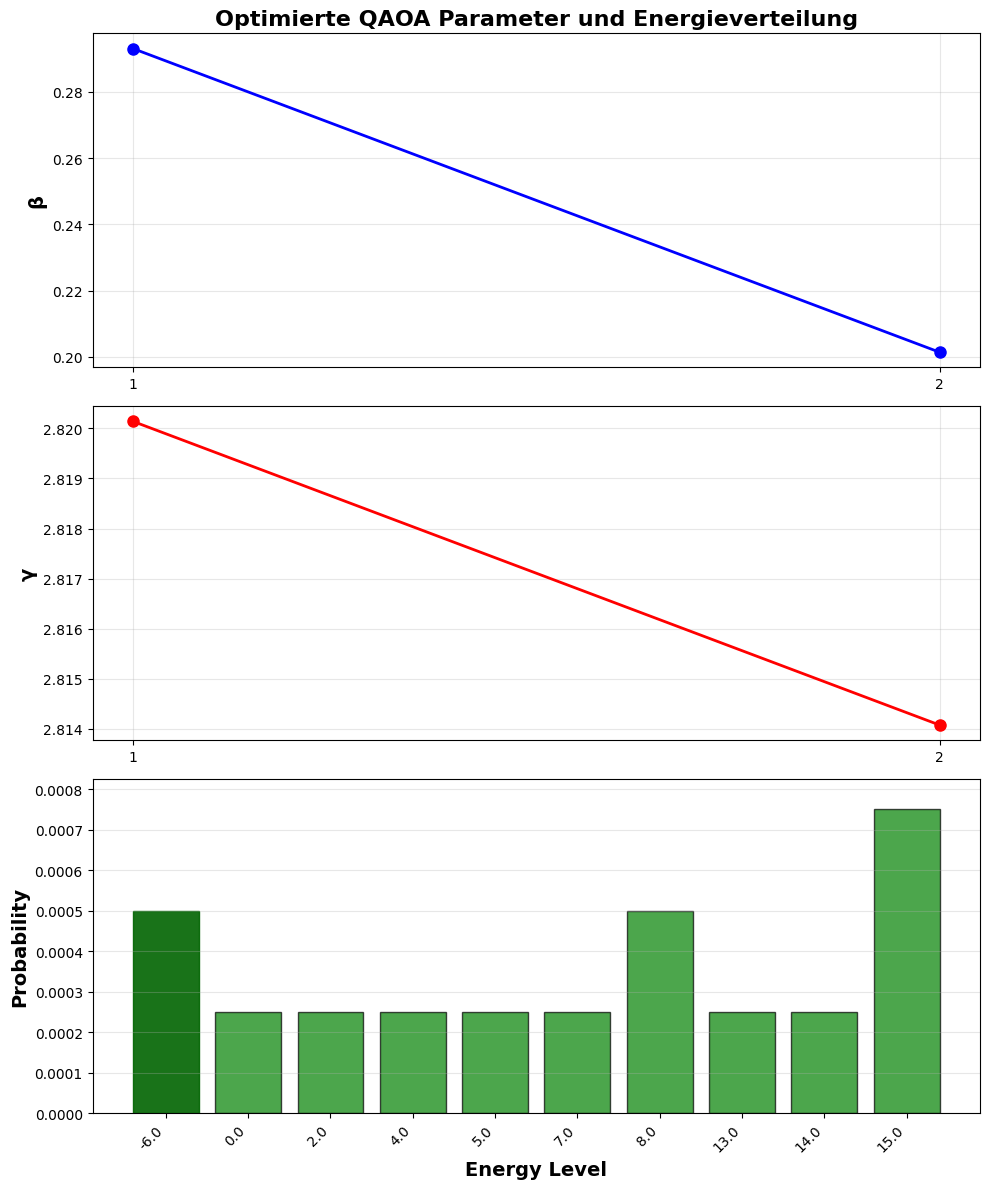


ZUSAMMENFASSUNG
Optimierte β: [0.3 0.2]
Optimierte γ: [2.8 2.8]

Beste gefundene Energie: -6.00
Wahrscheinlichkeit: 0.05%

CPLEX Optimum: -395.00
Approximation Ratio: 1.5%

Top-5 Energie-Levels:         
------------------------------------------------------------
1. Energie:   -6.00 | Wahrscheinlichkeit:  0.05%
2. Energie:    0.00 | Wahrscheinlichkeit:  0.03%
3. Energie:    2.00 | Wahrscheinlichkeit:  0.03%
4. Energie:    4.00 | Wahrscheinlichkeit:  0.03%
5. Energie:    5.00 | Wahrscheinlichkeit:  0.03%


In [18]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
print("="*60)
print("WAHRSCHEINLICHKEITSVERTEILUNG BERECHNEN")
print("="*60)
optimal_params = result.x
qc_optimal = candidate_circuit.assign_parameters(optimal_params)
qc_optimal.measure_all()
sampler = Sampler(mode=backend)
job = sampler.run([qc_optimal], shots=4000)
result_sampler = job.result()
counts = result_sampler[0].data.meas.get_counts()
shots = sum(counts.values())
print(f"✓ {len(counts)} verschiedene Bitstrings gemessen")
print(f"✓ Total shots: {shots}")
energy_distribution = defaultdict(float)
for bitstring, count in counts.items():
    x = np.array([int(bit) for bit in bitstring])
    energy = float(x @ Q @ x)
    prob = count / shots
    energy_distribution[energy] += prob
energies = sorted(energy_distribution.keys())
probs = [energy_distribution[e] for e in energies]
print(f"✓ {len(energies)} verschiedene Energie-Levels")
print(f"✓ Minimale Energie: {min(energies):.2f}")
print(f"✓ Maximale Energie: {max(energies):.2f}")
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
ax1 = axes[0]
beta_values = optimal_params[:len(optimal_params)//2]
ax1.plot(range(1, len(beta_values)+1), beta_values, 'bo-', linewidth=2, markersize=8)
ax1.set_ylabel('β', fontsize=14, fontweight='bold')
ax1.set_xticks(range(1, len(beta_values)+1))
ax1.grid(True, alpha=0.3)
ax1.set_title('Optimierte QAOA Parameter und Energieverteilung', fontsize=16, fontweight='bold')
ax2 = axes[1]
gamma_values = optimal_params[len(optimal_params)//2:]
ax2.plot(range(1, len(gamma_values)+1), gamma_values, 'ro-', linewidth=2, markersize=8)
ax2.set_ylabel('γ', fontsize=14, fontweight='bold')
ax2.set_xticks(range(1, len(gamma_values)+1))
ax2.grid(True, alpha=0.3)
ax3 = axes[2]
sorted_pairs = sorted(energy_distribution.items(), key=lambda x: x[0])[:10]
top_energies = [e for e, p in sorted_pairs]
top_probs = [p for e, p in sorted_pairs]
bars = ax3.bar(range(len(top_energies)), top_probs, color='green', alpha=0.7, edgecolor='black')
bars[0].set_color('darkgreen')  # Beste Lösung hervorheben
bars[0].set_alpha(0.9)
ax3.set_xlabel('Energy Level', fontsize=14, fontweight='bold')
ax3.set_ylabel('Probability', fontsize=14, fontweight='bold')
ax3.set_xticks(range(len(top_energies)))
ax3.set_xticklabels([f'{e:.1f}' for e in top_energies], rotation=45, ha='right')
ax3.grid(True, alpha=0.3, axis='y')
ax3.set_ylim(0, max(top_probs) * 1.1)
plt.tight_layout()
plt.savefig('qaoa_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n" + "="*60)
print("ZUSAMMENFASSUNG")
print("="*60)
print(f"Optimierte β: {beta_values}")
print(f"Optimierte γ: {gamma_values}")
print(f"\nBeste gefundene Energie: {min(energies):.2f}")
print(f"Wahrscheinlichkeit: {energy_distribution[min(energies)]:.2%}")
print(f"\nCPLEX Optimum: -395.00")
print(f"Approximation Ratio: {min(energies)/-395:.1%}")

print(f"\n{'Top-5 Energie-Levels:':<30}")
print("-"*60)
for i, (energy, prob) in enumerate(sorted_pairs[:5], 1):
    print(f"{i}. Energie: {energy:7.2f} | Wahrscheinlichkeit: {prob:6.2%}")
print("="*60)

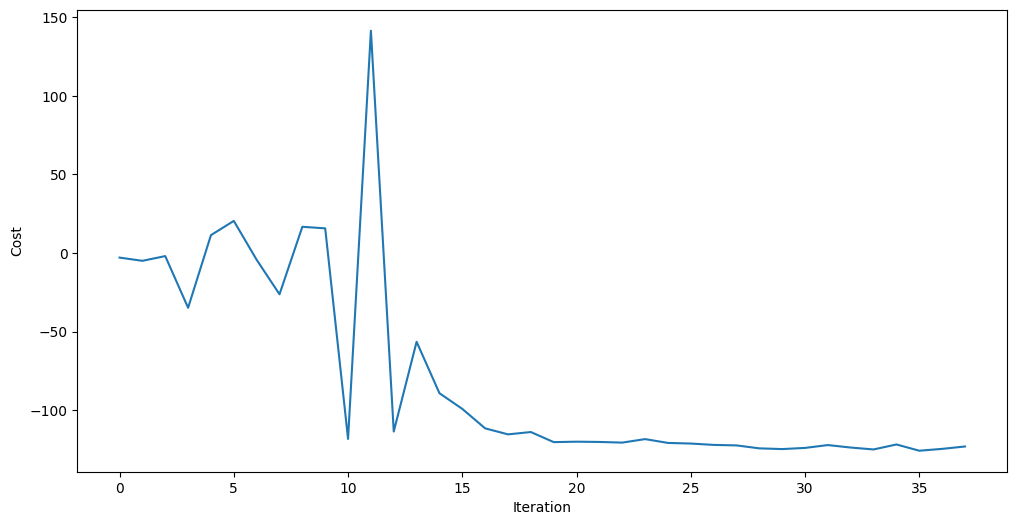

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(objective_func_vals)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

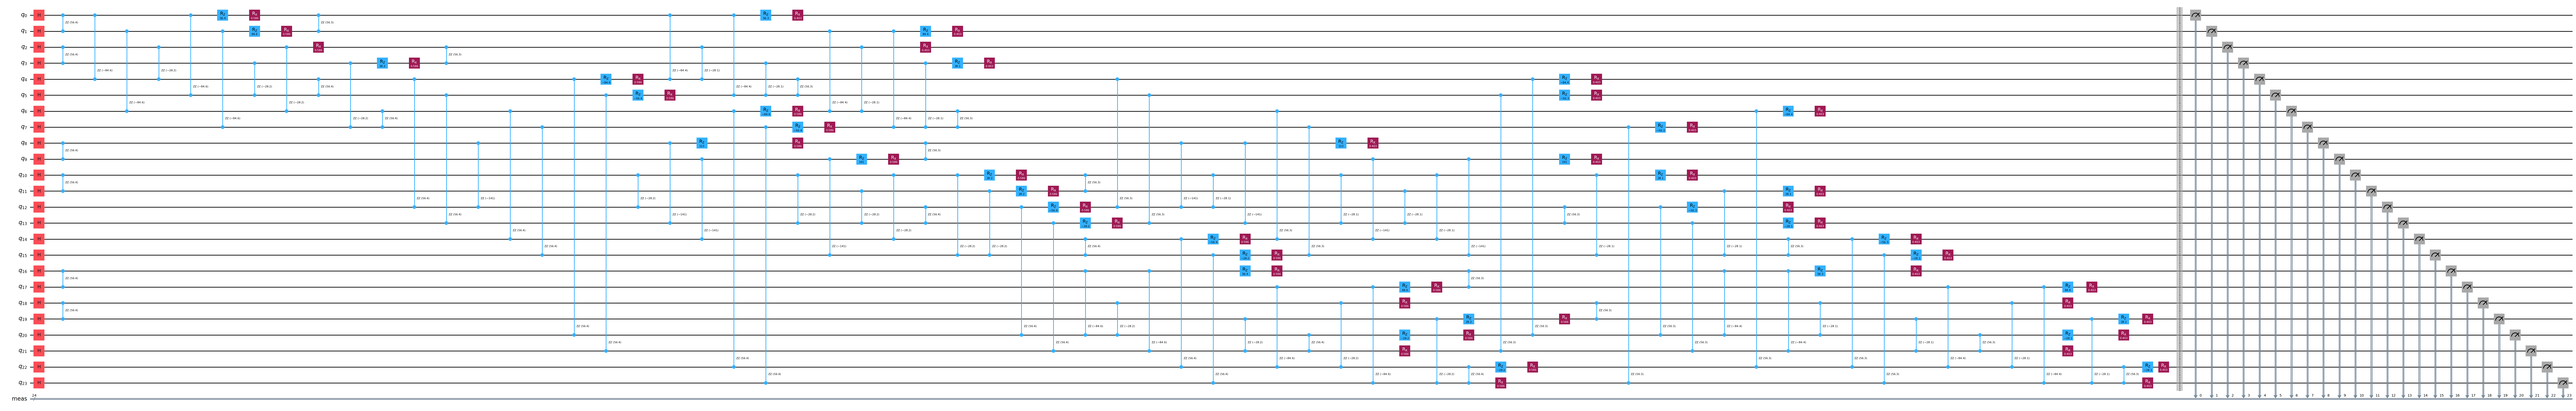

In [20]:
optimized_circuit = candidate_circuit.assign_parameters(result.x)
optimized_circuit.draw("mpl", fold=False, idle_wires=False)

In [21]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(mode=backend, options={"default_shots": 4_000})

pub = (optimized_circuit)
job = sampler.run([pub])

In [22]:
counts_bin = job.result()[0].data.meas.get_counts()
shots = job.result()[0].data.meas.num_shots
final_distribution_bin = {key: val / shots for key, val in counts_bin.items()}
print(final_distribution_bin)

{'010000000110001110100111': 0.00025, '111100110100011001101001': 0.00025, '011011101100001010001010': 0.00025, '001010011111101110010111': 0.0005, '100110011100001000100010': 0.00025, '110110000010010111100110': 0.00025, '000100011110011100011101': 0.00025, '011010010010100000000100': 0.00025, '101010010101001101100011': 0.00025, '010101110010001111111111': 0.00025, '100101000010110101001101': 0.00025, '000100000011100111010111': 0.00025, '110111010011000101010000': 0.00025, '100101000000000010101101': 0.00025, '011001011011110100000000': 0.00025, '101000010101101111100000': 0.00025, '100100110110011011100011': 0.00025, '100110010010110001001000': 0.00025, '100010010010100001110101': 0.00025, '101010110011110100001000': 0.00025, '010100101010110110010111': 0.00025, '101010111001010101011101': 0.00025, '001101110111011111010101': 0.00025, '001001101001101101100101': 0.00025, '001010010000010010010101': 0.00025, '010010101110011101111101': 0.00025, '010001011101101110101101': 0.00025, '

In [23]:
def classical_cost_fun(bit_str: str, Q: np.ndarray) -> float:
    x = np.array([int(bit) for bit in bit_str])
    return float(x @ Q @ x)  # float() um sicherzugehen

# Beste Lösungen finden
min_energy = float('inf')
best_solutions = []

for bit_str in counts_bin.keys():
    energy = classical_cost_fun(bit_str, Q)
    if energy < min_energy:
        min_energy = energy
        best_solutions = [bit_str]
    elif abs(energy - min_energy) < 1e-6:  # Gleiche Energie
        best_solutions.append(bit_str)

print(f"Minimale Energie: {min_energy:.2f}")
print(f"Anzahl beste Lösungen: {len(best_solutions)}")
print(f"Beste Lösung: {best_solutions[0]}")
print(best_solutions)

Minimale Energie: -12.00
Anzahl beste Lösungen: 1
Beste Lösung: 100001000110001110010100
['100001000110001110010100']


In [ ]:
# Prüfen ob der beste Bitstring in den Messungen war
best_bitstring = best_solutions[0]
print(f"Beste Lösung: {best_bitstring}")
print(f"War in Messungen? {best_bitstring in counts_bin}")
if best_bitstring in counts_bin:
    print(f"Häufigkeit: {counts_bin[best_bitstring]}")

# Alternative: Top 10 Lösungen mit ihren Häufigkeiten
print("\n" + "="*80)
print("TOP 10 LÖSUNGEN aus den tatsächlichen Messungen")
print("="*80)

energy_list = []
for bit_str, count in counts_bin.items():
    x = np.array([int(bit) for bit in bit_str])
    energy = float(x @ Q @ x)
    energy_list.append((bit_str, energy, count))

# Nach Energie sortieren
energy_list.sort(key=lambda x: x[1])

# Top 10 anzeigen
for i, (bit_str, energy, count) in enumerate(energy_list[:10], 1):
    prob = count / shots
    print(f"{i}. Bitstring: {bit_str}")
    print(f"   Energie: {energy:.2f} | Häufigkeit: {count}/{shots} ({prob*100:.2f}%)")
    print()

In [16]:
def decode_solution(bit_str: str, tasks, robots, slots):
    """
    Dekodiert den Bitstring zurück zu Task-Zuweisungen
    
    Variablen-Struktur (basierend auf typischer QUBO-Formulierung):
    - x-Variablen: Task → Robot Zuweisung
    - y-Variablen: Task → Zeitslot Zuweisung
    - w-Variablen: Task → (Robot, Zeitslot) kombinierte Zuweisung
    """
    x_bits = [int(bit) for bit in bit_str]
    
    n_tasks = len(tasks)
    n_robots = len(robots)
    n_slots = len(slots)
    
    # Variablen-Indexierung (anpassen an Ihre Struktur!)
    X_assignments = []
    Y_assignments = []
    W_assignments = []
    
    idx = 0
    
    # X-Variablen: Task → Robot (n_tasks × n_robots Variablen)
    for t_idx, task in enumerate(tasks):
        for r_idx, robot in enumerate(robots):
            if x_bits[idx] == 1:
                X_assignments.append(('x', task['name'], robot))
            idx += 1
    
    # Y-Variablen: Task → Slot (n_tasks × n_slots Variablen)
    for t_idx, task in enumerate(tasks):
        for s_idx, slot in enumerate(slots):
            if x_bits[idx] == 1:
                Y_assignments.append(('y', task['name'], slot))
            idx += 1
    
    # W-Variablen: Task → (Robot, Slot) (n_tasks × n_robots × n_slots)
    for t_idx, task in enumerate(tasks):
        for r_idx, robot in enumerate(robots):
            for s_idx, slot in enumerate(slots):
                if idx < len(x_bits) and x_bits[idx] == 1:
                    W_assignments.append(('w', task['name'], robot, slot))
                idx += 1
    
    return X_assignments, Y_assignments, W_assignments


# Ihre Problem-Daten (aus der JSON-Config)
tasks = [
    {"name": "T0", "p": 1},
    {"name": "T1", "p": 2},
    {"name": "T2", "p": 1}

]
robots = ["R1", "R2"]
slots = [0, 1, 2]

# Dekodierung
best_solution = best_solutions[0]
X, Y, W = decode_solution(best_solution, tasks, robots, slots)

print("="*60)
print("LÖSUNG DEKODIERT")
print("="*60)
print(f"\nBitstring: {best_solution}")
print(f"Energie: {min_energy:.2f}")
print(f"\nX=1: {X}")
print(f"Y=1: {Y}")
print(f"W=1: {W}")
print("="*60)

# Schöne Darstellung
print("\n" + "="*60)
print("SCHEDULING PLAN")
print("="*60)
for task in tasks:
    task_name = task['name']
    
    # Zugewiesener Robot
    robot = [x[2] for x in X if x[1] == task_name]
    robot_str = robot[0] if robot else "NICHT ZUGEWIESEN"
    
    # Zugewiesener Slot
    slot = [y[2] for y in Y if y[1] == task_name]
    slot_str = str(slot[0]) if slot else "NICHT ZUGEWIESEN"
    
    print(f"{task_name}: Robot={robot_str}, Zeitslot={slot_str}")

print("="*60)

NameError: name 'best_solutions' is not defined

In [ ]:
# Analyse der Variablen-Struktur
print(f"Bitstring-Länge: {len(best_solution)}")
print(f"Anzahl Tasks: {len(tasks)}")
print(f"Anzahl Robots: {len(robots)}")
print(f"Anzahl Slots: {len(slots)}")

n_x_vars = len(tasks) * len(robots)  # Task → Robot
n_y_vars = len(tasks) * len(slots)   # Task → Slot
n_w_vars = len(tasks) * len(robots) * len(slots)  # Task → (Robot, Slot)

print(f"\nErwartete Variablen:")
print(f"X-Variablen (Task→Robot): {n_x_vars}")
print(f"Y-Variablen (Task→Slot): {n_y_vars}")
print(f"W-Variablen (Task→Robot→Slot): {n_w_vars}")
print(f"Gesamt erwartet: {n_x_vars + n_y_vars + n_w_vars}")

# Schauen Sie sich die tatsächliche QUBO-Größe an
print(f"\nTatsächliche QUBO-Größe: {Q.shape[0]}")

# Einfache Dekodierung (nur basierend auf tatsächlichen Variablen)
def decode_simple(bit_str: str, tasks, robots, slots):
    """Vereinfachte Dekodierung ohne Annahmen über Struktur"""
    x_bits = [int(bit) for bit in bit_str]
    n_vars = len(x_bits)
    
    print(f"\nAktive Variablen (Index: Wert):")
    for i, bit in enumerate(x_bits):
        if bit == 1:
            print(f"  x[{i}] = 1")
    
    return x_bits

x_solution = decode_simple(best_solution, tasks, robots, slots)

In [17]:
from old.decode_best_solution import invert_map, decode_sample

inv_x = invert_map(x)        # idx -> (tname, rname)
inv_y = invert_map(y)        # idx -> (tname, z)
inv_w = invert_map(w) 

sample = {i: int(round(v)) for i, v in enumerate(result.x)}
#sample = {int(k): int(v) for k, v in sampleset.first.sample.items()}
chosen_x, chosen_y, chosen_w = decode_sample(sample, inv_x, inv_y, inv_w)
print("X=1:", chosen_x)
print("Y=1:", chosen_y)
print("W=1:", chosen_w)

NameError: name 'result' is not defined

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Derive robots and tasks
robots = sorted({r for _, t, r in chosen_x} | {r for _, t, r, z in chosen_w})
tasks = sorted({t for _, t, r in chosen_x} | {t for _, t, z in chosen_y} | {t for _, t, r, z in chosen_w})
slots = sorted({z for _, t, r, z in chosen_w} | {z for _, t, z in chosen_y})

# Build schedule table: rows = time slots, columns = robots, value = list of tasks running
schedule = {r: {z: [] for z in slots} for r in robots}
for _, t, r, z in chosen_w:
    schedule[r][z].append(t)

df = pd.DataFrame({r: [", ".join(schedule[r][z]) if schedule[r][z] else "" for z in slots] for r in robots},
                  index=slots)
df.index.name = "Time slot"

# Detect conflicts (more than one task on the same robot & time slot)
conflicts = []
for r in robots:
    for z in slots:
        if len(schedule[r][z]) > 1:
            conflicts.append((r, z, schedule[r][z]))

# Display the schedule table to the user
#from caas_jupyter_tools import display_dataframe_to_user
#display_dataframe_to_user("Theoretischer Arbeitsplan (Slots × Roboter)", df)

# Build a simple Gantt-like chart per robot (horizontal bars for each task segment)
# We'll draw each task segment as a single-slot bar (duration = 1) wherever w=1.
# If tasks span consecutive slots, they will appear as adjacent bars.
fig, ax = plt.subplots(figsize=(8, 2 + 0.6*len(robots)))

# Map robots to lanes
robot_to_lane = {r: i for i, r in enumerate(robots)}

# Collect segments: (lane, start, duration, label)
segments = []
for _, t, r, z in chosen_w:
    lane = robot_to_lane[r]
    segments.append((lane, z, 1, f"{t}@{r}"))

# -------- NEU: konsistente Farben pro (Task, Roboter) --------
# Alle Labels (t@r), stabil sortiert -> Farbindex
labels = sorted({lbl for _, _, _, lbl in segments})
cmap = plt.cm.get_cmap('tab20', max(20, len(labels)))  # diskrete Palette
label_to_color = {lbl: cmap(i % cmap.N) for i, lbl in enumerate(labels)}

# Draw bars mit konsistenten Farben
for lane, start, dur, label in segments:
    ax.barh(lane, dur, left=start, color=label_to_color[label], edgecolor='black', linewidth=0.5)
    ax.text(start + dur/2, lane, label, va='center', ha='center', fontsize=9)




ax.set_yticks(list(robot_to_lane.values()), list(robot_to_lane.keys()))
ax.set_xlabel("Time slot")
ax.set_ylabel("Roboter")
ax.set_title("Gantt-Übersicht (1 Slot = 1 Zeiteinheit)")
ax.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Prepare a short textual summary of assignments and conflicts
summary_lines = []
summary_lines.append("Zuordnung x (Task → Roboter):")
for _, t, r in chosen_x:
    summary_lines.append(f"  - {t} → {r}")
summary_lines.append("Startslots y (Task → Startslot):")
for _, t, z in chosen_y:
    summary_lines.append(f"  - {t} beginnt bei Slot {z}")
summary_lines.append("Belegte Slots w (Task, Roboter, Slot):")
for _, t, r, z in sorted(chosen_w, key=lambda e: (e[2], e[3], e[1])):
    summary_lines.append(f"  - {r} bei Slot {z}: {t}")

if conflicts:
    summary_lines.append("⚠️ Konflikte erkannt (mehr als ein Task auf demselben Roboter im selben Slot):")
    for r, z, ts in conflicts:
        summary_lines.append(f"  - {r} Slot {z}: {', '.join(ts)}")
else:
    summary_lines.append("Keine Konflikte erkannt.")

print("\n".join(summary_lines))

NameError: name 'chosen_x' is not defined